## <span style="color:brown"> 파일핸들링 & OS 기본명령어 </span>

### <span style="color:brown"> Text 파일 생성 </span>

In [1]:
def write_txt(filepath):
    count = 1
    data = []
    print('파일에 내용을 저장하려면 내용을 입력하지 말고 [Enter]를 누르세요')
    
    while True:
        text = input('[%d] 파일에 저장할 내용을 입력하세요: ' %count)
        if text == '':
            break
        data.append(text+'\n')
        count += 1
        
    f = open(filepath, 'w')
    f.writelines(data)
    f.close()
    
    ret = 'TEXT 파일을 생성하였습니다.'
    
    return ret

In [5]:
filepath = r'C:\Users\ktm\Anaconda_source\data\something.txt'
write_txt(filepath)

파일에 내용을 저장하려면 내용을 입력하지 말고 [Enter]를 누르세요
[1] 파일에 저장할 내용을 입력하세요: to be honest
[2] 파일에 저장할 내용을 입력하세요: I want to tell you something
[3] 파일에 저장할 내용을 입력하세요: before I leave
[4] 파일에 저장할 내용을 입력하세요: 


'TEXT 파일을 생성하였습니다.'

In [7]:
f = open(filepath, 'r')
data = f.read()
f.close()

print(data)

to be honest
I want to tell you something
before I leave



### <span style="color:blue"> Text 파일 복사 </span>

In [16]:
f = open(r'C:\Users\ktm\Anaconda_source\data\something.txt', 'r')
h = open(r'C:\Users\ktm\Anaconda_source\data\something_copy.txt', 'w')

data = f.read()
h.write(data)

h.close()
f.close()

In [19]:
with open(r'C:\Users\ktm\Anaconda_source\data\something_copy.txt', 'r') as fp:
    data = fp.read()
    print(data)

to be honest
I want to tell you something
before I leave



### <span style="color:blue"> Image 파일 복사 </span>

In [20]:
from IPython.display import Image

origin_img = './data/snow.jpg'
copied_img = './data/snow_copy.jpg'

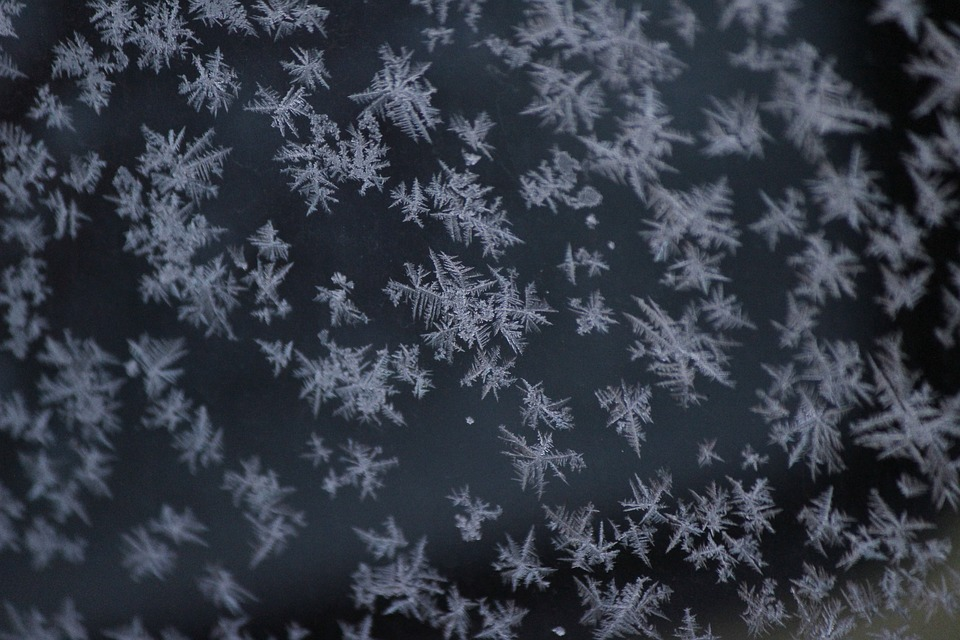

In [21]:
Image(origin_img)

In [26]:
bufsize = 1024
f = open(origin_img, 'rb')
h = open(copied_img, 'wb')

data = f.read(bufsize)
while data:
    h.write(data)
    data = f.read(bufsize)

h.close()
f.close()

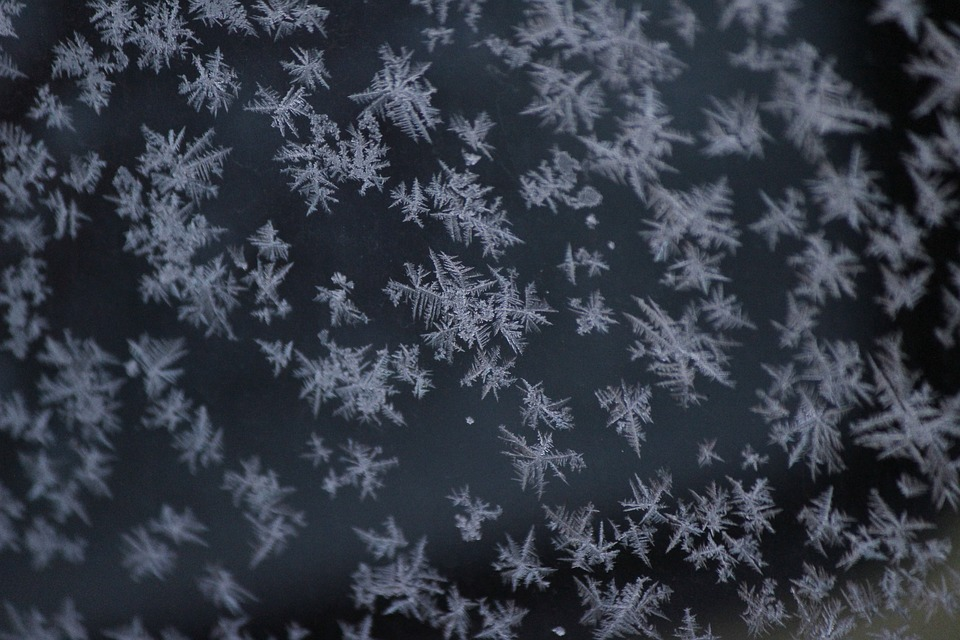

In [27]:
Image(copied_img)

## <span style="color:brown"> 파일핸들링 & OS 기본명령어 </span>

### <span style="color:blue"> 파일 크기 구하기(os.path.getsize) </span>

In [28]:
from os.path import getsize

file1 = './data/something_copy.txt'
file2 = './data/snow.jpg'

file_size1 = getsize(file1)
file_size2 = getsize(file2)

print('File Name: %s \t File Size: %d Byte' %(file1, file_size2))
print('File Name: %s \t File Size: %d Byte' %(file2, file_size2))

File Name: ./data/something_copy.txt 	 File Size: 177890 Byte
File Name: ./data/snow.jpg 	 File Size: 177890 Byte


### <span style="color:blue"> 파일 삭제하기(os.remove) </span>

In [29]:
from os import remove

target_file = './data/something_copy.txt'
k = input('[%s]  파일을 삭제하겠습니까? ([y]/n)' %target_file)

if k == 'y' or k == '':
    remove(target_file)
    print('[%s] 파일을 삭제했습니다.' %target_file)

[./data/something_copy.txt]  파일을 삭제하겠습니까? ([y]/n)n


### <span style="color:blue"> 파일이름 바꾸기(os.rename) </span>

In [33]:
from os import rename

folder_path = './data/'
target_file = folder_path + 'something.txt'
newname  = input('[%s]에 대한 새로운 파일 이름을 입력하세요: ' % target_file)

new_file = newname
rename(target_file, new_file)
print('[%s] -> [%s]로 파일이름이 변경되었습니다.' %(target_file, new_file))

[./data/something.txt]에 대한 새로운 파일 이름을 입력하세요: brightsomething
[./data/something.txt] -> [brightsomething]로 파일이름이 변경되었습니다.


### <span style="color:blue"> 파일을 다른 디렉터리로 이동하기(os.rename)  </span>

In [34]:
target_file = new_file
newpath = input('[%s]를 이동할 디렉터리의 절대경로를 입력하세요: ' %target_file)

if newpath[-1] == '/':
    newname = newpath + target_file
else:
    newname = newpath + '/' + target_file

try:
    rename(target_file, newname)
    print('[%s] -> [%s]로 이동되었습니다.' %(target_file, newname))
except FileNotFoundError as e:
    print(e)

[brightsomething]를 이동할 디렉터리의 절대경로를 입력하세요: C:/Users/ktm/Desktop
[brightsomething] -> [C:/Users/ktm/Desktop/brightsomething]로 이동되었습니다.


###  <span style="color:blue"> 디렉터리에 있는 파일목록 얻기(os.listdir, glob.glob) </span>

In [35]:
import os,glob

folder ='data'
file_list1 = os.listdir(folder)
print(file_list1)

files ='data/*.txt'
file_list2 = glob.glob(files)
print(file_list2)

['.ipynb_checkpoints', '123.csv', '123.txt', 'company.csv', 'company.txt', 'hello.txt', 'snow.jpg', 'snow_copy.jpg', 'something_copy.txt', 'students.csv', 'subject.txt']
['data\\123.txt', 'data\\company.txt', 'data\\hello.txt', 'data\\something_copy.txt', 'data\\subject.txt']


###  <span style="color:blue"> 현재 디렉터리 확인하고 바꾸기(os.getcwd, os.chdir) </span>

In [36]:
pdir = os.getcwd(); print(pdir)
os.chdir('data');   print(os.getcwd())
os.chdir('..');   print(os.getcwd())
os.chdir(pdir);   print(os.getcwd())

C:\Users\ktm\Anaconda_source
C:\Users\ktm\Anaconda_source\data
C:\Users\ktm\Anaconda_source
C:\Users\ktm\Anaconda_source


###  <span style="color:blue"> 디렉터리 생성하기(os.mkdir) </span>

In [38]:
newfolder = input('새로 생성할 디렉터리 이름을 입력하세요: ')

try:
    os.mkdir(newfolder)
    print('[%s] 디렉터리를 새로 생성했습니다.' % newfolder)
except Exception as e:
    print(e)

새로 생성할 디렉터리 이름을 입력하세요: new!!!
[new!!!] 디렉터리를 새로 생성했습니다.


### <span style="color:blue"> 디렉터리 제거하기(osrmdir) </span>

In [39]:
target_folder = newfolder
k = input('[%s] 디렉터리를 삭제하겠습니까? (y/n)' % target_folder)
if k == 'y':
    try:
        os.rmdir(target_folder)
        print('[%s] 디렉터리를 삭제했습니다.' %target_folder)
    except Exception as e:
        print(e)

[new!!!] 디렉터리를 삭제하겠습니까? (y/n)y
[new!!!] 디렉터리를 삭제했습니다.


### <span style="color:blue"> 하위 디렉터리 및 파일 전체 삭제하기(shutil.rmtree) </span> 

In [ ]:
'''
target_folder = 'E:/devlab/tmp'
print('[%s] 하위 모든 디렉터리 및 파일들을 삭제합니다.' %target_folder)

for file in os.listdir(target_folder):
    print(file)
k = input('[%s]를 삭제하겠습니까? (y/n) ' %target_folder)

if k == 'y':
    try:
        shutil.rmtree(target_folder)
        print('[%s]의 모든 하위 디렉터리와 파일들을 삭제했습니다.' %target_folder)
    except Exception as e:
        print(e)
'''

### <span style="color:blue"> 파일이 존재하는지 체크하기(os.pathexists) </span> 

In [40]:
from os.path import exists

dir_name = input('새로 생성할 디렉터리 이름을 입력하세요: ')

if not exists(dir_name):
    os.mkdir(dir_name)
    print('[%s] 디렉터리를 생성했습니다.' %dir_name)
else:
    print('[%s]은(는) 이미 존재합니다.' %dir_name)

새로 생성할 디렉터리 이름을 입력하세요: data
[data]은(는) 이미 존재합니다.


### <span style="color:blue"> 파일인지 디렉터리인지 확인하기(os.pathisfile, os.pathisdir) </span> 

In [ ]:
Signature: os.listdir(path=None)
Docstring:
Return a list containing the names of the files in the directory.

path can be specified as either str or bytes.  If path is bytes,
  the filenames returned will also be bytes; in all other circumstances
  the filenames returned will be str.
If path is None, uses the path='.'.
On some platforms, path may also be specified as an open file descriptor;\
  the file descriptor must refer to a directory.
  If this functionality is unavailable, using it raises NotImplementedError.

The list is in arbitrary order.  It does not include the special
entries '.' and '..' even if they are present in the directory.
Type:      builtin_function_or_method

In [41]:
from os.path import isdir, isfile

files = os.listdir()

for file in files:
    if isdir(file):
        print('DIR: %s' %file)
        
for file in files:
    if isfile(file):
        print('FILE: %s' %file)

DIR: .ipynb_checkpoints
DIR: data
FILE: BPC_A201_FileIO_Basic.ipynb
FILE: BPC_A202_FileIO_OS-CMD.ipynb
FILE: Review_01.ipynb
FILE: Review_02.ipynb
FILE: Review_03.ipynb
FILE: Review_04.ipynb
FILE: Review_05.ipynb
FILE: Review_06.ipynb
FILE: Review_07.ipynb
